<a href="https://colab.research.google.com/github/QuanRy/SI-I-I_3_labs/blob/main/lab_4/lab_4_colab_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
training_data = pd.read_csv('alcohol-consumption.csv')
training_data.head(10)

country  total_consumption  recorded_consumption  \
0         Estonia               16.9                  15.8   
1       Lithuania               15.0                  13.8   
2  Czech Republic               14.3                  12.4   
3      Seychelles               13.8                  12.4   
4         Germany               13.4                  11.3   
5         Nigeria               13.4                   9.6   
6         Ireland               13.0                  11.3   
7         Moldova               13.0                  11.5   
8          Latvia               12.9                  11.1   
9        Bulgaria               12.7                  11.4   

   unrecorded_consumption  beer_percentage  wine_percentage  \
0                     1.1             32.7              7.4   
1                     1.2             43.6              7.3   
2                     1.4             53.3             21.3   
3                     1.4             68.9             22.4   
4                     1.4             52.6             28.4   
5                     3.8              7.9              0.4   
6                     1.4             47.0             28.0   
7                     1.4             35.4             44.6   
8                     1.9             42.8             11.1   
9                     1.3             38.8             17.2   

   spirits_percentage  other_percentage  2020_projection  2025_projection  
0                50.3               9.6             11.5             11.9  
1                37.1              12.1             14.4             13.9  
2                25.4               0.0             11.2             11.4  
3                 6.3               2.5             10.4             10.6  
4                18.9               0.0             12.8             12.6  
5                 0.6              91.1             13.0             12.5  
6                18.8               6.2             13.5             13.9  
7                20.0               0.0             12.6             12.4  
8                40.0               6.1             14.0             15.1  
9                42.9               1.2             13.0             13.4

In [28]:
training_data = training_data.dropna()

In [29]:
training_data.shape

(179, 10)

In [30]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 183
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 179 non-null    object 
 1   total_consumption       179 non-null    float64
 2   recorded_consumption    179 non-null    float64
 3   unrecorded_consumption  179 non-null    float64
 4   beer_percentage         179 non-null    float64
 5   wine_percentage         179 non-null    float64
 6   spirits_percentage      179 non-null    float64
 7   other_percentage        179 non-null    float64
 8   2020_projection         179 non-null    float64
 9   2025_projection         179 non-null    float64
dtypes: float64(9), object(1)
memory usage: 15.4+ KB


In [31]:
training_data.hist(figsize=(15, 15));

In [34]:
training_data = training_data.drop(['country'], axis=1)

In [35]:
training_data.head()

total_consumption  recorded_consumption  unrecorded_consumption  \
0               16.9                  15.8                     1.1   
1               15.0                  13.8                     1.2   
2               14.3                  12.4                     1.4   
3               13.8                  12.4                     1.4   
4               13.4                  11.3                     1.4   

   beer_percentage  wine_percentage  spirits_percentage  other_percentage  \
0             32.7              7.4                50.3               9.6   
1             43.6              7.3                37.1              12.1   
2             53.3             21.3                25.4               0.0   
3             68.9             22.4                 6.3               2.5   
4             52.6             28.4                18.9               0.0   

   2020_projection  2025_projection  
0             11.5             11.9  
1             14.4             13.9  
2             11.2             11.4  
3             10.4             10.6  
4             12.8             12.6

In [36]:
training_values = training_data['2025_projection']

In [37]:
training_points = training_data.drop('2025_projection', axis=1)
training_points.head()

total_consumption  recorded_consumption  unrecorded_consumption  \
0               16.9                  15.8                     1.1   
1               15.0                  13.8                     1.2   
2               14.3                  12.4                     1.4   
3               13.8                  12.4                     1.4   
4               13.4                  11.3                     1.4   

   beer_percentage  wine_percentage  spirits_percentage  other_percentage  \
0             32.7              7.4                50.3               9.6   
1             43.6              7.3                37.1              12.1   
2             53.3             21.3                25.4               0.0   
3             68.9             22.4                 6.3               2.5   
4             52.6             28.4                18.9               0.0   

   2020_projection  
0             11.5  
1             14.4  
2             11.2  
3             10.4  
4             12.8

In [38]:
training_points.shape

(179, 8)

In [40]:
from sklearn import linear_model, ensemble
linear_regression_model = linear_model.LinearRegression() 
random_forest_model = ensemble.RandomForestRegressor(random_state=123)

In [41]:
linear_regression_model.fit(training_points, training_values)
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(random_state=123)

In [42]:
test_data = pd.read_csv('alcohol-consumption.csv')
test_data.head(8)

country  total_consumption  recorded_consumption  \
0         Estonia               16.9                  15.8   
1       Lithuania               15.0                  13.8   
2  Czech Republic               14.3                  12.4   
3      Seychelles               13.8                  12.4   
4         Germany               13.4                  11.3   
5         Nigeria               13.4                   9.6   
6         Ireland               13.0                  11.3   
7         Moldova               13.0                  11.5   

   unrecorded_consumption  beer_percentage  wine_percentage  \
0                     1.1             32.7              7.4   
1                     1.2             43.6              7.3   
2                     1.4             53.3             21.3   
3                     1.4             68.9             22.4   
4                     1.4             52.6             28.4   
5                     3.8              7.9              0.4   
6                     1.4             47.0             28.0   
7                     1.4             35.4             44.6   

   spirits_percentage  other_percentage  2020_projection  2025_projection  
0                50.3               9.6             11.5             11.9  
1                37.1              12.1             14.4             13.9  
2                25.4               0.0             11.2             11.4  
3                 6.3               2.5             10.4             10.6  
4                18.9               0.0             12.8             12.6  
5                 0.6              91.1             13.0             12.5  
6                18.8               6.2             13.5             13.9  
7                20.0               0.0             12.6             12.4

In [43]:
test_data.shape

(189, 10)

In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 189 non-null    object 
 1   total_consumption       189 non-null    float64
 2   recorded_consumption    189 non-null    float64
 3   unrecorded_consumption  189 non-null    float64
 4   beer_percentage         179 non-null    float64
 5   wine_percentage         179 non-null    float64
 6   spirits_percentage      179 non-null    float64
 7   other_percentage        179 non-null    float64
 8   2020_projection         189 non-null    float64
 9   2025_projection         189 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.9+ KB


In [45]:
test_data.head()

country  total_consumption  recorded_consumption  \
0         Estonia               16.9                  15.8   
1       Lithuania               15.0                  13.8   
2  Czech Republic               14.3                  12.4   
3      Seychelles               13.8                  12.4   
4         Germany               13.4                  11.3   

   unrecorded_consumption  beer_percentage  wine_percentage  \
0                     1.1             32.7              7.4   
1                     1.2             43.6              7.3   
2                     1.4             53.3             21.3   
3                     1.4             68.9             22.4   
4                     1.4             52.6             28.4   

   spirits_percentage  other_percentage  2020_projection  2025_projection  
0                50.3               9.6             11.5             11.9  
1                37.1              12.1             14.4             13.9  
2                25.4               0.0             11.2             11.4  
3                 6.3               2.5             10.4             10.6  
4                18.9               0.0             12.8             12.6

In [46]:
test_data = test_data.dropna()

In [48]:
test_data = test_data.drop(['country'], axis=1)

In [49]:
test_data.head()

total_consumption  recorded_consumption  unrecorded_consumption  \
0               16.9                  15.8                     1.1   
1               15.0                  13.8                     1.2   
2               14.3                  12.4                     1.4   
3               13.8                  12.4                     1.4   
4               13.4                  11.3                     1.4   

   beer_percentage  wine_percentage  spirits_percentage  other_percentage  \
0             32.7              7.4                50.3               9.6   
1             43.6              7.3                37.1              12.1   
2             53.3             21.3                25.4               0.0   
3             68.9             22.4                 6.3               2.5   
4             52.6             28.4                18.9               0.0   

   2020_projection  2025_projection  
0             11.5             11.9  
1             14.4             13.9  
2             11.2             11.4  
3             10.4             10.6  
4             12.8             12.6

In [50]:
test_data.shape

(179, 9)

In [51]:
test_values = test_data['2025_projection']
test_points = test_data.drop('2025_projection', axis=1)
test_points.head()

total_consumption  recorded_consumption  unrecorded_consumption  \
0               16.9                  15.8                     1.1   
1               15.0                  13.8                     1.2   
2               14.3                  12.4                     1.4   
3               13.8                  12.4                     1.4   
4               13.4                  11.3                     1.4   

   beer_percentage  wine_percentage  spirits_percentage  other_percentage  \
0             32.7              7.4                50.3               9.6   
1             43.6              7.3                37.1              12.1   
2             53.3             21.3                25.4               0.0   
3             68.9             22.4                 6.3               2.5   
4             52.6             28.4                18.9               0.0   

   2020_projection  
0             11.5  
1             14.4  
2             11.2  
3             10.4  
4             12.8

In [52]:
test_points.shape

(179, 8)

In [53]:
list(test_points)==list(training_points)

True

In [54]:
test_predictions_linear = linear_regression_model.predict(test_points)
test_predictions_random_forest = random_forest_model.predict(test_points)

In [58]:
#Визуализируем прогноз линейной модели и настоящие значения из тестовой выборки
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_linear)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящее значение', fontsize=20)
plt.ylabel('Предсказанное значение', fontsize=20);

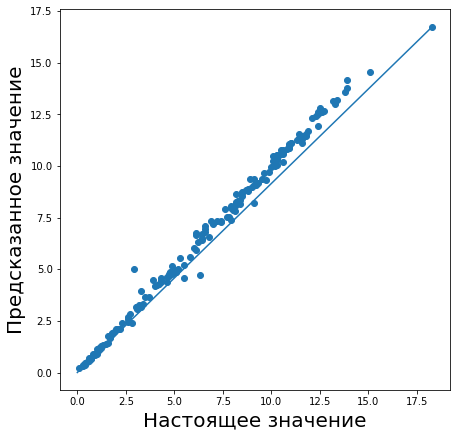

In [59]:
#Визуализируем прогноз модели случайного леса и настоящие значения из тестовой выборки
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_random_forest)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящее значение', fontsize=20)
plt.ylabel('Предсказанное значение', fontsize=20);

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)
r2_score_linear_model = r2_score(test_values, test_predictions_linear)

In [62]:
mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)
r2_score_random_forest_model = r2_score(test_values, test_predictions_random_forest)

In [63]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model".format(
        mean_absolute_error(test_values, test_predictions_linear), 
        mean_squared_error(test_values, test_predictions_linear)**0.5, r2_score_linear_model))

print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest), 
       mean_squared_error(test_values, test_predictions_random_forest)**0.5, r2_score_random_forest_model))

MAE:    0.47, RMSE:    0.76, R2:    0.96 for linear model
MAE:    0.19, RMSE:    0.32,  R2:    0.99 for random forest model
